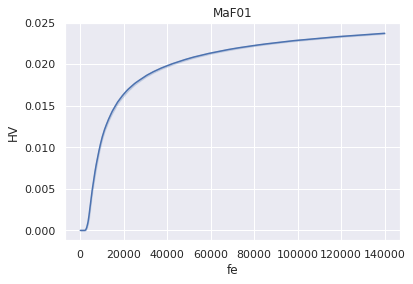

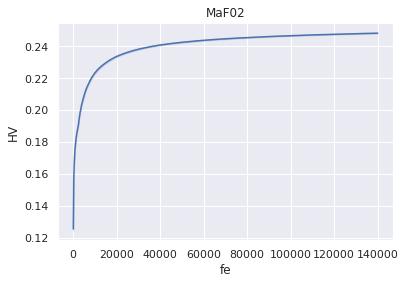

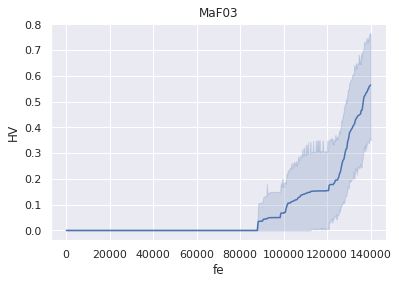

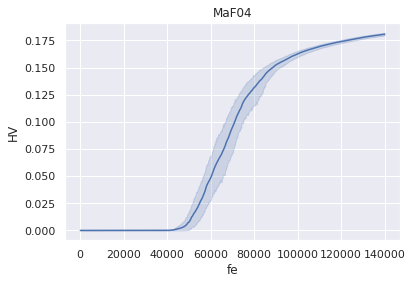

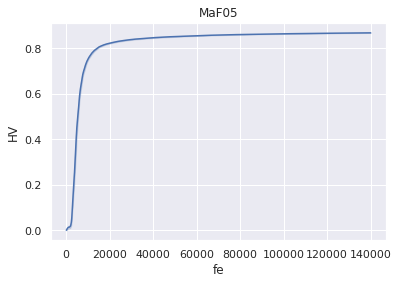

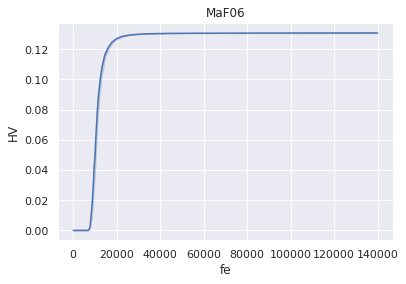

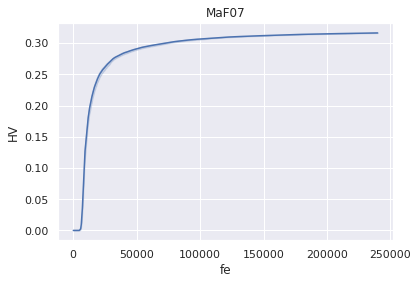

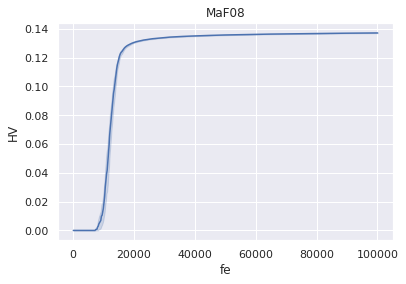

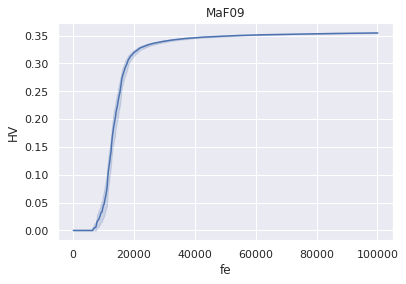

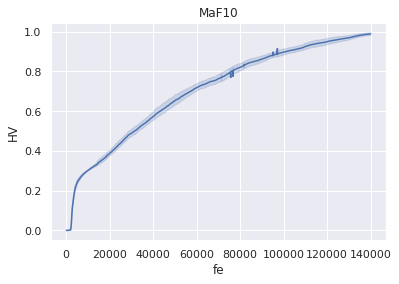

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

probs=["MaF01", "MaF02", "MaF03", "MaF04", "MaF05" 
       , "MaF06", "MaF07", "MaF08", "MaF09", "MaF10"]
       # , "MaF11", "MaF12", "MaF13", "MaF14", "MaF15"]
pop_size = 210
columns = [str(i) for i in range(0, 20)]
filelist = ["hvimprovement."+col for col in columns]

for prob in probs:
    path="../MaFMethodology/5/fullhv/HHCOR2/%s/output/"%(prob)
    df_list=[]
    run=0
    for file in filelist:
        df = pd.read_csv(path+file, names=["HV"])
        df['fe'] = np.arange(len(df))
        df['it'] = df['fe'] // pop_size
        df['run'] = run
        run+=1
        df_list.append(df)

    df = pd.concat(df_list)
    df_mean = df.groupby(['it', 'run']).mean().reset_index()
    sns.lineplot(x="fe", y="HV", data=df_mean).set_title(prob)
    plt.show()

